### Resources:
* [D-separation steps](http://web.mit.edu/jmn/www/6.034/d-separation.pdf)
* [bnlearn datasets](https://www.bnlearn.com/bnrepository/)
* [Daggity paper](https://academic.oup.com/ije/article/45/6/1887/2907796)
* [Milestone](https://gitlab.pnnl.gov/y0-scuc/y0-archive/-/milestones/4)
* [pgmpy](https://github.com/pgmpy/pgmpy/blob/dev/examples/Creating%20a%20Discrete%20Bayesian%20Network.ipynb)  -- get_independencies

### TODO:
* Break into module, write proper unit tests
* What about conditional independencies?  Currently only covers independencies.  
   * Can I just enumerate tripples and check 'A,B given=["C"]'?  
   * Would then check combinations-pairs + combinations-givens 
   * Up to how many givens do you check?

In [1]:
from y0.algorithm import falsification
from y0.graph import ADMG
import y0.examples
from y0.dsl import Variable

import networkx as nx
import pandas as pd

import seaborn as sns
from itertools import chain
from tqdm import tqdm
%matplotlib inline

%load_ext autoreload
%autoreload 2

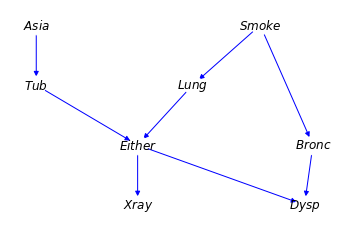

In [2]:
asia_G = y0.examples.asia_example.graph #.to_admg()
asia_df = y0.examples.asia_example.data

asia_G.draw()

In [3]:
asia_df

,Unnamed: 0,Asia,Smoke,Tub,Lung,Bronc,Either,Xray,Dysp
0,1,-1,1,-1,-1,1,-1,-1,1
1,2,-1,1,-1,-1,-1,-1,-1,-1
2,3,-1,-1,1,-1,-1,1,1,1
3,4,-1,-1,-1,-1,1,-1,-1,1
4,5,-1,-1,-1,-1,-1,-1,-1,1
...,...,...,...,...,...,...,...,...,...
4995,4996,-1,-1,-1,-1,1,-1,1,1
4996,4997,-1,-1,-1,-1,-1,-1,-1,-1
4997,4998,-1,-1,-1,-1,-1,-1,-1,-1
4998,4999,-1,1,-1,-1,-1,-1,-1,1


In [8]:
issues = falsification.get_graph_falsifications(asia_G, asia_df, max_given=2, verbose=True)

d-separation check: 28it [00:00, 288.93it/s]
Checking conditionals: 100%|██████████| 17/17 [00:00<00:00, 162.72it/s]


In [9]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
0,Lung,Xray,Either,0.000000,1,1.000000,0.002778,False
13,Either,Smoke,Lung,0.000000,1,1.000000,0.010000,False
12,Smoke,Tub,,0.000000,1,1.000000,0.008333,False
5,Tub,Xray,Either,0.000000,1,1.000000,0.003846,False
11,Smoke,Xray,Lung,0.278697,2,0.869925,0.007143,False
15,Dysp,Xray,Either,0.617808,2,0.734251,0.016667,False
10,Lung,Tub,,0.129525,1,0.718925,0.006250,False
16,Bronc,Xray,Lung,0.697125,2,0.705702,0.025000,False
2,Asia,Lung,,0.201322,1,0.653656,0.003125,False
14,Asia,Either,Tub,0.300140,1,0.583795,0.012500,False


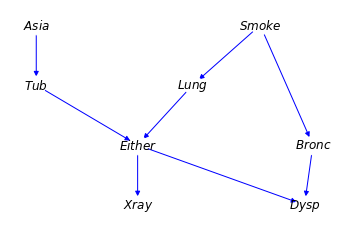

In [19]:
# Should be issues (Lung, Either) AT LEAST.
#.  Seeing issues (Lung, Xray) as well.  Is that all? 
# TODO: Check d-separations by hand...
import copy
asia_G2 = copy.deepcopy(asia_G)
asia_G2.draw()

In [20]:
asia_G2.directed.remove_edge(Variable("Lung"), Variable("Either")) #delete_diedge("Lung", "Either")
issues = falsification.get_graph_falsifications(asia_G2, asia_df)
issues.failures

Series([], dtype: float64)

In [28]:
issues.evidence

,left,right,given,chi^2,p,dof,Holm–Bonferroni level,flagged
19,Dysp,Lung,"(Smoke,)",83.247571,0.000000e+00,2,0.016667,True
15,Dysp,Smoke,"(Bronc,)",21.128858,2.581824e-05,2,0.007143,True
3,Lung,Xray,(),2094.106838,0.000000e+00,1,0.002632,True
4,Either,Lung,(),3099.534805,0.000000e+00,1,0.002778,True
20,Either,Smoke,(),196.335994,1.316547e-44,1,0.025000,True
17,Smoke,Xray,(),127.464729,1.469901e-29,1,0.010000,True
10,Bronc,Either,(),22.547558,2.050050e-06,1,0.004167,True
0,Bronc,Xray,(),14.983980,1.084278e-04,1,0.002273,True
18,Asia,Xray,"(Either,)",4.268355,1.183419e-01,2,0.012500,False
9,Bronc,Lung,"(Smoke,)",3.477138,1.757718e-01,2,0.003846,False


In [21]:
issues

Falsifications(failures=Series([], dtype: float64), evidence=      left   right   given        chi^2  p           dof  \
15     Tub    Xray  Either     0.000000  1  1.000000e+00   
5    Smoke     Tub             0.000000  1  1.000000e+00   
4     Dysp     Tub  Either     0.000000  1  1.000000e+00   
19    Dysp    Xray  Either     0.617808  2  7.342514e-01   
3     Lung     Tub             0.129525  1  7.189249e-01   
1     Asia    Lung             0.201322  1  6.536561e-01   
14    Asia  Either     Tub     0.300140  1  5.837949e-01   
9     Asia    Xray     Tub     0.413105  1  5.203979e-01   
18    Asia    Dysp     Tub     1.471978  2  4.790315e-01   
12   Bronc    Lung   Smoke     3.477138  2  1.757718e-01   
11    Asia   Smoke             1.841060  1  1.748268e-01   
13   Bronc     Tub             2.364399  1  1.241317e-01   
2     Asia   Bronc             2.495844  1  1.141472e-01   
16   Bronc    Xray            14.983980  1  1.084278e-04   
8     Dysp   Smoke   Bronc    21.128858